<b>Mochammad Naufal Septifiandi</b><br>
<b><u>101319002</u></b>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1. Data Preprocessing

## Import Data

In [5]:
df = pd.read_excel('Chapter4_Geologic_DataSet.xlsx')
df

,GR_API,"Bulk Density, gcc","Resistivity, ohm-m","Water Saturation, fraction","PhiH, ft","TOC, fraction","TVD, ft"
0,118,2.2096,23,0.13,23,0.077,10670
1,170,2.2185,21,0.17,20,0.073,9932
2,166,2.2260,14,0.20,21,0.070,9747
3,166,2.2260,14,0.20,21,0.070,9747
4,135,2.2303,22,0.16,24,0.068,9222
...,...,...,...,...,...,...,...
433,123,2.2307,24,0.14,22,0.068,9605
434,141,2.2598,20,0.20,19,0.056,10086
435,157,2.2616,20,0.17,18,0.055,9008
436,142,2.2523,14,0.21,22,0.059,10397


## Statistics

In [6]:
df.describe()

,GR_API,"Bulk Density, gcc","Resistivity, ohm-m","Water Saturation, fraction","PhiH, ft","TOC, fraction","TVD, ft"
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,157.972603,2.242265,22.438356,0.159863,20.283105,0.063221,9935.125571
std,30.396528,0.019978,7.971895,0.037465,3.187825,0.008410,827.981530
min,66.000000,2.209100,5.000000,0.100000,10.000000,0.032000,8046.000000
25%,139.000000,2.226425,17.000000,0.130000,19.000000,0.057000,9372.250000
50%,155.000000,2.239300,22.000000,0.150000,20.000000,0.065000,9844.500000
75%,178.000000,2.255925,26.000000,0.190000,22.000000,0.070000,10440.000000
max,259.000000,2.319600,49.000000,0.310000,33.000000,0.077000,12474.000000


## Null Check and Removal

In [39]:
df.isnull().values.any()

False

## Data Standardization

In [23]:
X = df[['TVD, ft', 'GR_API', 'Bulk Density, gcc', 'Resistivity, ohm-m',
       'Water Saturation, fraction', 'PhiH, ft', 'TOC, fraction']]

In [24]:
X

,"TVD, ft",GR_API,"Bulk Density, gcc","Resistivity, ohm-m","Water Saturation, fraction","PhiH, ft","TOC, fraction"
0,10670,118,2.2096,23,0.13,23,0.077
1,9932,170,2.2185,21,0.17,20,0.073
2,9747,166,2.2260,14,0.20,21,0.070
3,9747,166,2.2260,14,0.20,21,0.070
4,9222,135,2.2303,22,0.16,24,0.068
...,...,...,...,...,...,...,...
433,9605,123,2.2307,24,0.14,22,0.068
434,10086,141,2.2598,20,0.20,19,0.056
435,9008,157,2.2616,20,0.17,18,0.055
436,10397,142,2.2523,14,0.21,22,0.059


In [26]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# 2. Modelling

## KMeans Cluster Modelling

In [35]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import rand_score, adjusted_rand_score, silhouette_score

inertia_list = []
rand_list = []
adjusted_list = []
silhouette_list = []
n_cluster = np.arange(2, 15, 1)
for i in n_cluster:
    model = KMeans(n_clusters=i)
    y_pred = model.fit_predict(X_scaled)
    inertia_list.append(model.inertia_)
    # rand_list.append(rand_score(y, y_pred))
    # adjusted_list.append(adjusted_rand_score(y, y_pred))
    silhouette_list.append(silhouette_score(X_scaled, y_pred))

## Elbow Plots

Text(0.5, 1.0, 'Elbow Plot: Sum of Square')

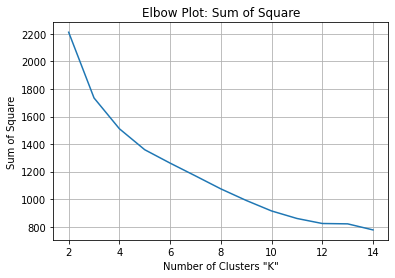

In [40]:
# fig, ax = plt.subplots()
plt.plot(n_cluster, inertia_list)
plt.xlabel('Number of Clusters "K"')
plt.ylabel('Sum of Square')
plt.grid()
plt.title('Elbow Plot: Sum of Square')

Text(0.5, 1.0, 'Elbow Plot: Silhouette Score')

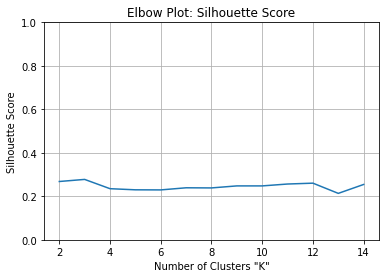

In [41]:
# fig, ax = plt.subplots()
plt.plot(n_cluster, silhouette_list)
plt.xlabel('Number of Clusters "K"')
plt.ylabel('Silhouette Score')
plt.ylim(0,1)
plt.grid()
plt.title('Elbow Plot: Silhouette Score')

# 3. Interpretation

Berdasarkan dua elbow plot yang dihasilkan, dapat ditentukan jumlah cluster yang sesuai untuk data tersebut. Pada elbow plot untuk sum of square, nilainya selalu turun tiap pertambahan jumlah cluster. Dapat dilihat pada nilai cluster = 3, sum of square-nya cenderung "patah". Ini juga diperkuat dengan nilai silhouette score yang paling tinggi ketika nilai cluster = 3. Sehingga, jumlah cluster yang paling optimal adalah 3.